# E-Commerce Delivery Analysis

Goal for this project
1. Build a multi output regressor using various machine learning models to determine the range of shipping time, by predicting the fastest and Normal duration of shipping.
2. Build a classifier to predict the probabily of late deliveries.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("DataCoSupplyChainDataset.csv",encoding="unicode_escape")
pd.set_option("display.max_columns",None)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
colms=df.columns

# Exploratory Data Analysis

In [5]:
print("Number of Rows: {}".format(df.shape[0]))
print("Number of Columns: {}".format(df.shape[1]))
print("Number of Numerical Variables: {}".format(len([features for features in colms if df[features].dtypes!="O"])))
print("Number of Categorical Variables: {}".format(len([features for features in colms if df[features].dtypes=="O"])))

Number of Rows: 180519
Number of Columns: 53
Number of Numerical Variables: 29
Number of Categorical Variables: 24


In [6]:
num_var=[features for features in colms if df[features].dtypes!="O"]
cat_var=[features for features in colms if df[features].dtypes=="O"]

In [7]:
null_feat=[features for features in colms if df[features].isnull().sum()>0]

In [8]:
print("features having null values ")
for i in null_feat:
    print(i+": "+str(df[i].isnull().sum()))

features having null values 
Customer Lname: 8
Customer Zipcode: 3
Order Zipcode: 155679
Product Description: 180519


In [9]:
import seaborn as sns

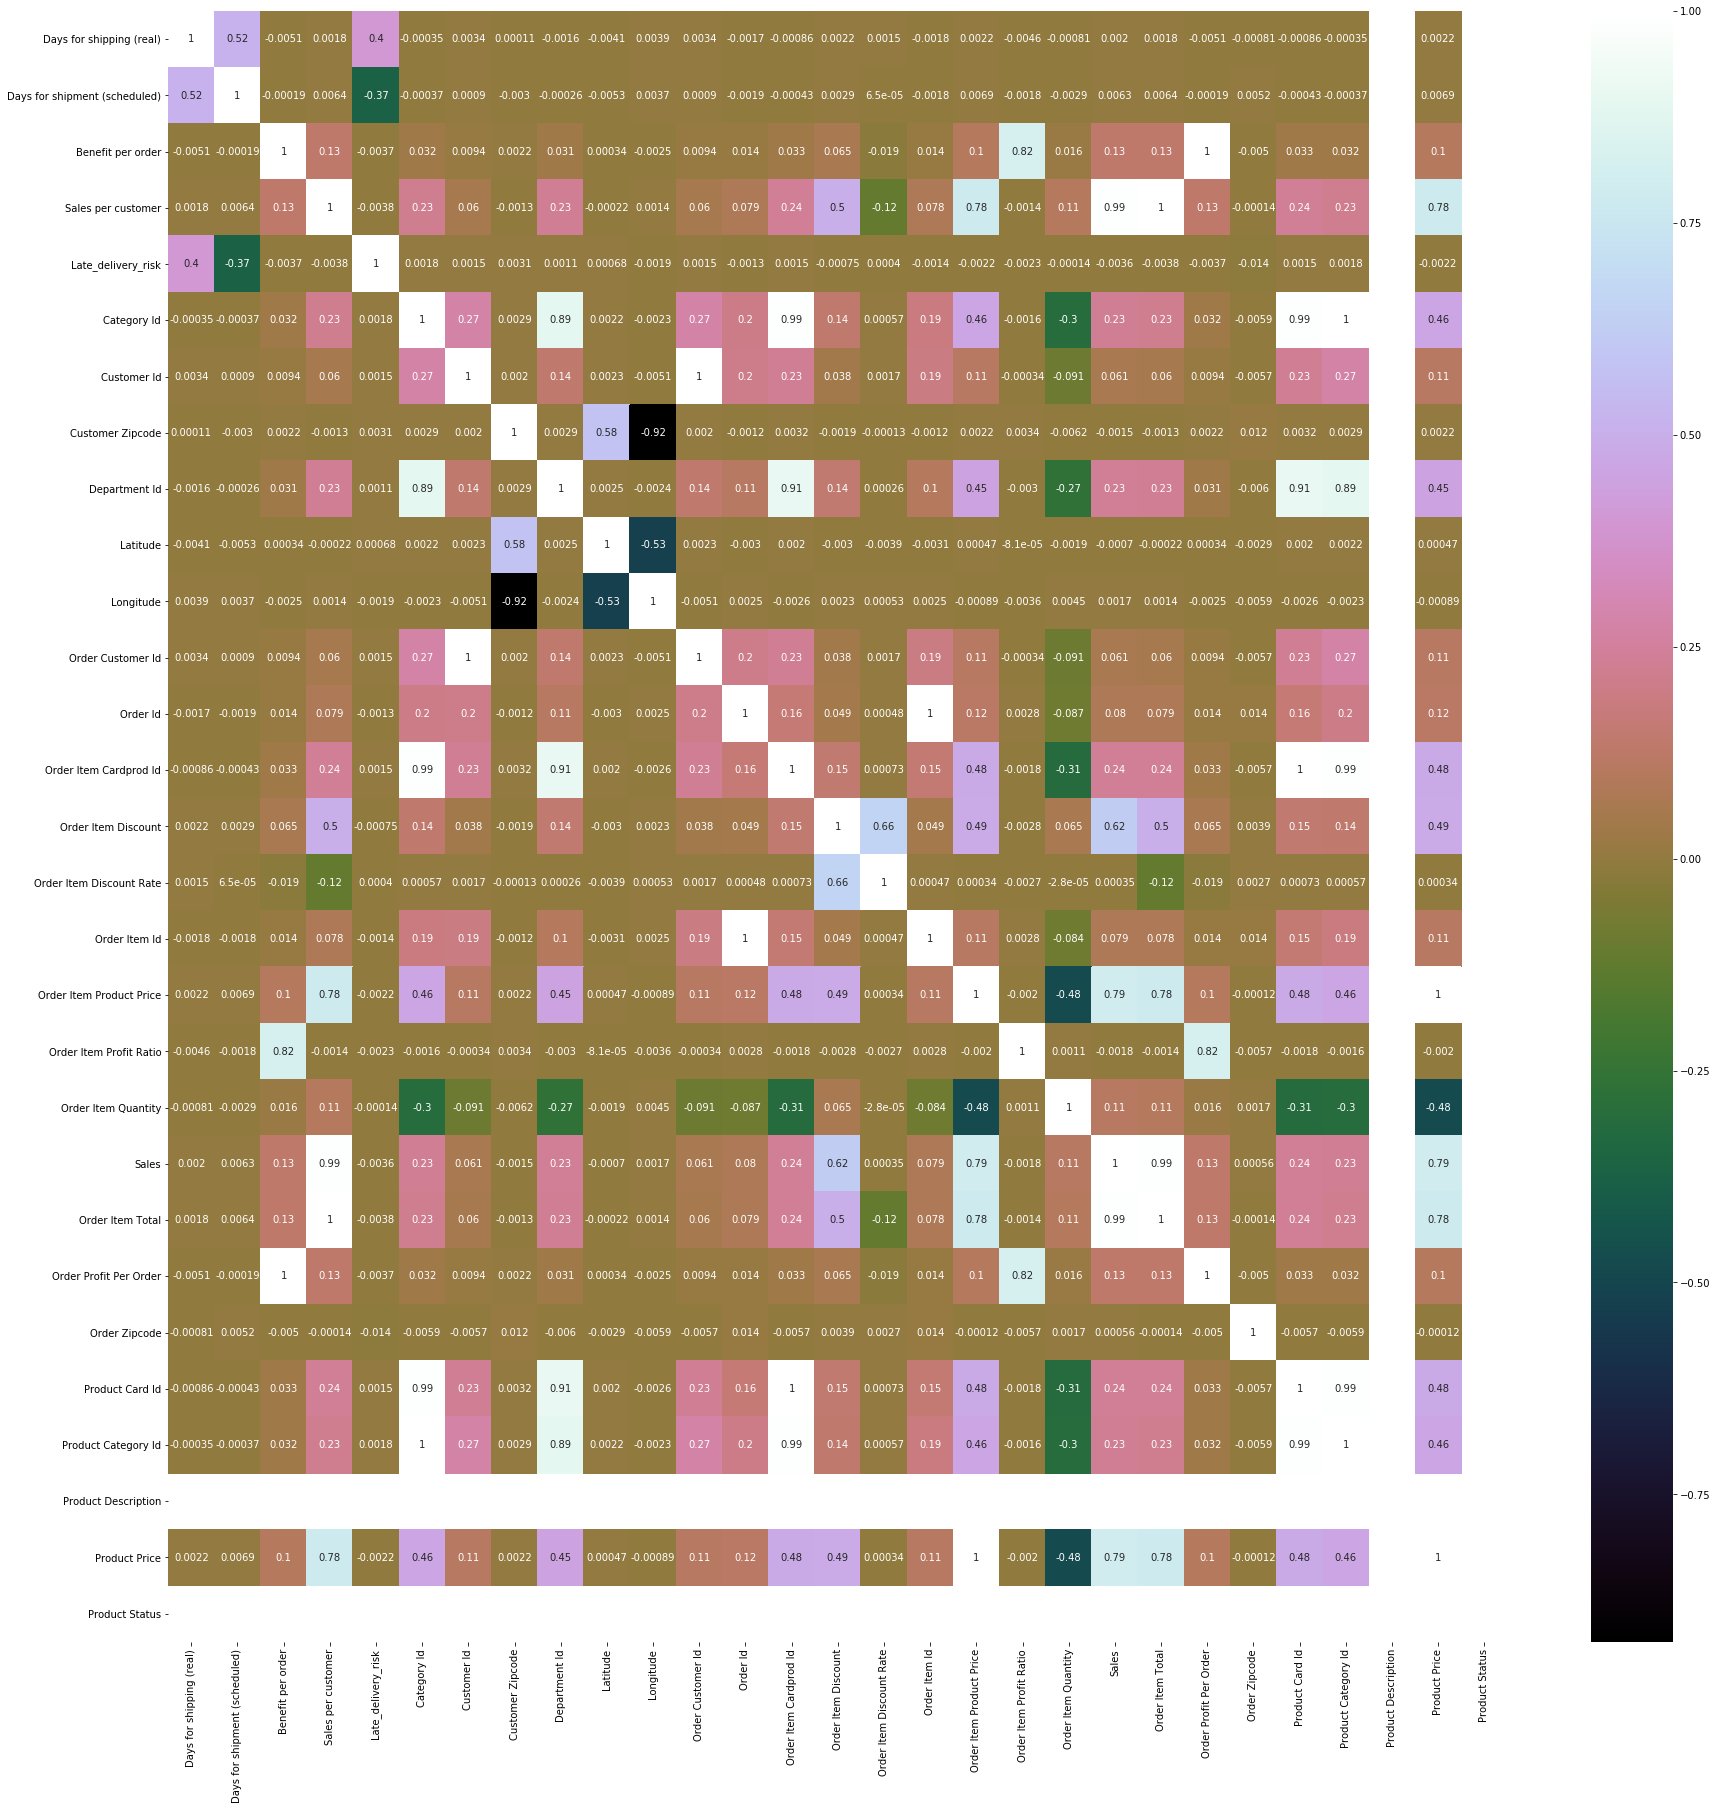

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap="cubehelix")

Insites from the correlation heatmap
Very less/Null correlation
1. Product description
2. Product status

Very high correlation
1. [Benefit per order],Order Profit Per Order
2. Sales,[Sales per customer],order item total
3. [Category id],Product Category Id,Prodcuct Card Id,Order Item CardProd Id
4. [Customer id],Order Customer id
5. [Department Id], Product Category Id,Product Card Id
6. Order Id,[Order item id]
7. [Product price],Order Item product price


In [11]:
df.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,0.401415,-0.000348,0.003432,0.000112,-0.001631,-0.004073,0.003911,0.003432,-0.001711,-0.000859,0.002231,0.001467,-0.001769,0.002185,-0.004638,-0.000811,0.001962,0.001757,-0.005101,-0.000811,-0.000859,-0.000348,NaN,0.002185,NaN
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.369352,-0.000367,0.000899,-0.003019,-0.000262,-0.005300,0.003675,0.000899,-0.001878,-0.000431,0.002897,0.000065,-0.001848,0.006912,-0.001822,-0.002925,0.006327,0.006445,-0.000185,0.005249,-0.000431,-0.000367,NaN,0.006912,NaN
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,-0.003727,0.031889,0.009354,0.002235,0.031442,0.000338,-0.002521,0.009354,0.013716,0.033161,0.064756,-0.018644,0.013556,0.103459,0.823689,0.015696,0.131816,0.133484,1.000000,-0.004978,0.033161,0.031889,NaN,0.103459,NaN
Sales per customer,0.001757,0.006445,0.133484,1.000000,-0.003791,0.225201,0.060181,-0.001304,0.232367,-0.000223,0.001444,0.060181,0.079000,0.236367,0.498734,-0.119469,0.078176,0.781781,-0.001439,0.105413,0.989744,1.000000,0.133484,-0.000138,0.236367,0.225201,NaN,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,-0.003727,-0.003791,1.000000,0.001752,0.001484,0.003148,0.001077,0.000679,-0.001915,0.001484,-0.001293,0.001490,-0.000750,0.000404,-0.001376,-0.002175,-0.002316,-0.000139,-0.003564,-0.003791,-0.003727,-0.014131,0.001490,0.001752,NaN,-0.002175,NaN
Category Id,-0.000348,-0.000367,0.031889,0.225201,0.001752,1.000000,0.274633,0.002898,0.888835,0.002195,-0.002320,0.274633,0.198496,0.991092,0.140180,0.000572,0.186796,0.461059,-0.001614,-0.302408,0.227483,0.225201,0.031889,-0.005943,0.991092,1.000000,NaN,0.461059,NaN
Customer Id,0.003432,0.000899,0.009354,0.060181,0.001484,0.274633,1.000000,0.002022,0.136897,0.002335,-0.005146,1.000000,0.204821,0.228039,0.038490,0.001712,0.191814,0.111118,-0.000337,-0.091328,0.060961,0.060181,0.009354,-0.005659,0.228039,0.274633,NaN,0.111118,NaN
Customer Zipcode,0.000112,-0.003019,0.002235,-0.001304,0.003148,0.002898,0.002022,1.000000,0.002878,0.584553,-0.923921,0.002022,-0.001210,0.003173,-0.001861,-0.000135,-0.001208,0.002191,0.003364,-0.006174,-0.001490,-0.001304,0.002235,0.011843,0.003173,0.002898,NaN,0.002191,NaN
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.001077,0.888835,0.136897,0.002878,1.000000,0.002460,-0.002435,0.136897,0.106757,0.906117,0.144617,0.000255,0.101676,0.446743,-0.003044,-0.265437,0.234718,0.232367,0.031442,-0.005982,0.906117,0.888835,NaN,0.446743,NaN
Latitude,-0.004073,-0.005300,0.000338,-0.000223,0.000679,0.002195,0.002335,0.584553,0.002460,1.000000,-0.525122,0.002335,-0.002984,0.002031,-0.002997,-0.003889,-0.003058,0.000471,-0.000081,-0.001853,-0.000696,-0.000223,0.000338,-0.002921,0.002031,0.002195,NaN,0.000471,NaN


In [12]:
print("Distict values for categorical variable")
for i in cat_var:
    print(i+"\n"+str(df[i].value_counts())+" number of distict values")

Distict values for categorical variable
Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64 number of distict values
Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64 number of distict values
Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys

shipping date (DateOrders)
11/29/2015 16:21    10
8/31/2015 12:58     10
4/17/2015 22:16     10
2/20/2015 23:03     10
5/28/2016 9:58      10
                    ..
2/22/2016 2:50       1
6/2/2015 11:26       1
6/21/2017 21:20      1
1/10/2018 21:03      1
7/23/2016 4:38       1
Name: shipping date (DateOrders), Length: 63701, dtype: int64 number of distict values
Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64 number of distict values


In [13]:
feat=[feat for feat in colms if "Id" in feat]

In [14]:
print("Number of rows in each columns:{}".format(df.shape[0]))
for i in feat:
    print(i+" "+str(df[i].count()))

Number of rows in each columns:180519
Category Id 180519
Customer Id 180519
Department Id 180519
Order Customer Id 180519
Order Id 180519
Order Item Cardprod Id 180519
Order Item Id 180519
Product Card Id 180519
Product Category Id 180519


In [15]:
df.drop(feat,axis=1,inplace=True)

In [16]:
df.drop(["Product Image","Product Status","Product Description"],axis=1,inplace=True)

In [17]:
df_feat=["Type","Days for shipping (real)","Days for shipment (scheduled)","Benefit per order","Sales per customer",
         "Late_delivery_risk","Category Name","Customer City","Customer Segment","Department Name","Market"
         ,"Order City","Order Country","Order Region","Order State","Order Status","Shipping Mode","Product Price"]

In [18]:
df_dely=df[df_feat]

In [19]:
df_dely.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer City,Customer Segment,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Shipping Mode,Product Price
0,DEBIT,3,4,91.250000,314.640015,0,Sporting Goods,Caguas,Consumer,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,Standard Class,327.75
1,TRANSFER,5,4,-249.089996,311.359985,1,Sporting Goods,Caguas,Consumer,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,PENDING,Standard Class,327.75
2,CASH,4,4,-247.779999,309.720001,0,Sporting Goods,San Jose,Consumer,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,Standard Class,327.75
3,DEBIT,3,4,22.860001,304.809998,0,Sporting Goods,Los Angeles,Home Office,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,Standard Class,327.75
4,PAYMENT,2,4,134.210007,298.250000,0,Sporting Goods,Caguas,Corporate,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,Standard Class,327.75


In [20]:
#Now converting the date time feature to datetime datatype
df["Order date"]=pd.to_datetime(df["order date (DateOrders)"])
df["Shipping date"]=pd.to_datetime(df["shipping date (DateOrders)"])

In [21]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Order date,Shipping date
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,Smart watch,327.75,2/3/2018 22:56,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,Smart watch,327.75,1/18/2018 12:27,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,1/13/2018 12:06,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,Smart watch,327.75,1/17/2018 12:06,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,1/13/2018 11:45,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,Smart watch,327.75,1/16/2018 11:45,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,1/13/2018 11:24,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,Smart watch,327.75,1/15/2018 11:24,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00


In [22]:
df_dely["Order Year"]=pd.DatetimeIndex(df["Order date"]).year
df_dely["Order Month"]=pd.DatetimeIndex(df["Order date"]).month
df_dely["Order Day"]=pd.DatetimeIndex(df["Order date"]).day
df_dely["Shipping Year"]=pd.DatetimeIndex(df["Shipping date"]).year
df_dely["Shipping Month"]=pd.DatetimeIndex(df["Shipping date"]).month
df_dely["Shipping Day"]=pd.DatetimeIndex(df["Shipping date"]).day

C:\Users\shree\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shree\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shree\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [23]:
df_dely.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer City,Customer Segment,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Shipping Mode,Product Price,Order Year,Order Month,Order Day,Shipping Year,Shipping Month,Shipping Day
0,DEBIT,3,4,91.250000,314.640015,0,Sporting Goods,Caguas,Consumer,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,Standard Class,327.75,2018,1,31,2018,2,3
1,TRANSFER,5,4,-249.089996,311.359985,1,Sporting Goods,Caguas,Consumer,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,PENDING,Standard Class,327.75,2018,1,13,2018,1,18
2,CASH,4,4,-247.779999,309.720001,0,Sporting Goods,San Jose,Consumer,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,Standard Class,327.75,2018,1,13,2018,1,17
3,DEBIT,3,4,22.860001,304.809998,0,Sporting Goods,Los Angeles,Home Office,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,Standard Class,327.75,2018,1,13,2018,1,16
4,PAYMENT,2,4,134.210007,298.250000,0,Sporting Goods,Caguas,Corporate,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,Standard Class,327.75,2018,1,13,2018,1,15


In [24]:
#perform onehot encoding 
df_dely=pd.get_dummies(df_dely)

In [25]:
#Since number of features have dratically increased we need to remove some features which have very low variance since 
#they wont contribute much to the model
from sklearn.feature_selection import VarianceThreshold

In [38]:
var_thr=VarianceThreshold(threshold=0.1)
var_thr.fit(df_dely)

VarianceThreshold(threshold=0.1)

In [39]:
print(sum(var_thr.get_support()))
print(df_dely.shape)

38
(180519, 5534)


In [40]:
cont_clms=[c for c in df_dely.columns if c not in df_dely.columns[var_thr.get_support()]]

In [41]:
len(cont_clms)

5496

In [43]:
for column in cont_clms:
    print(column)

Type_CASH
Category Name_Accessories
Category Name_As Seen on  TV!
Category Name_Baby 
Category Name_Baseball & Softball
Category Name_Basketball
Category Name_Books 
Category Name_Boxing & MMA
Category Name_CDs 
Category Name_Cameras 
Category Name_Camping & Hiking
Category Name_Cardio Equipment
Category Name_Children's Clothing
Category Name_Computers
Category Name_Consumer Electronics
Category Name_Crafts
Category Name_DVDs
Category Name_Electronics
Category Name_Fishing
Category Name_Fitness Accessories
Category Name_Garden
Category Name_Girls' Apparel
Category Name_Golf Apparel
Category Name_Golf Bags & Carts
Category Name_Golf Balls
Category Name_Golf Gloves
Category Name_Golf Shoes
Category Name_Health and Beauty
Category Name_Hockey
Category Name_Hunting & Shooting
Category Name_Indoor/Outdoor Games
Category Name_Kids' Golf Clubs
Category Name_Lacrosse
Category Name_Men's Clothing
Category Name_Men's Golf Clubs
Category Name_Music
Category Name_Pet Supplies
Category Name_Shop By

Order City_Changwon
Order City_Changzhi
Order City_Changzhou
Order City_Chaohu
Order City_Chaoyang
Order City_Chaozhou
Order City_Chapecó
Order City_Chapel Allerton
Order City_Charallave
Order City_Charleroi
Order City_Charlotte
Order City_Charlottesville
Order City_Chartres
Order City_Chatham
Order City_Chatou
Order City_Chattanooga
Order City_Chaumont
Order City_Chaville
Order City_Cheliábinsk
Order City_Chelles
Order City_Chelmsford
Order City_Cheltenham
Order City_Chemnitz
Order City_Chengdu
Order City_Chengjiang
Order City_Chennai
Order City_Chenzhou
Order City_Cheonan
Order City_Cherbourg-Octeville
Order City_Cherkasy
Order City_Chernihiv
Order City_Chesapeake
Order City_Cheshunt
Order City_Chester
Order City_Chesterfield
Order City_Chetumal
Order City_Chevilly-Larue
Order City_Chicago
Order City_Chiclana de la Frontera
Order City_Chiclayo
Order City_Chico
Order City_Chieti
Order City_Chifeng
Order City_Chigasaki
Order City_Chihuahua
Order City_Chililabombwe
Order City_Chilly-Maz

Order City_Leiden
Order City_Leipzig
Order City_Lens
Order City_Lençóis Paulista
Order City_Leoben
Order City_Leominster
Order City_Les Abymes
Order City_Les Clayes-sous-Bois
Order City_Les Herbiers
Order City_Les Lilas
Order City_Les Mureaux
Order City_Les Pavillons-sous-Bois
Order City_Les Pennes-Mirabeau
Order City_Les Ulis
Order City_Leshan
Order City_Letchworth
Order City_Leuven
Order City_Levallois-Perret
Order City_Leverkusen
Order City_Levin
Order City_Lewiston
Order City_León
Order City_Lianyuan
Order City_Lianzhou
Order City_Liaocheng
Order City_Liaoyang
Order City_Liaoyuan
Order City_Liberec
Order City_Libourne
Order City_Libreville
Order City_Licheng
Order City_Lichinga
Order City_Lida
Order City_Likasi
Order City_Lille
Order City_Lima
Order City_Limay
Order City_Limbe
Order City_Limeira
Order City_Limoeiro do Norte
Order City_Limoges
Order City_Linares
Order City_Lincoln
Order City_Lincoln Park
Order City_Linden
Order City_Lindenhurst
Order City_Linhai
Order City_Linhares


Order City_Sevastopol
Order City_Severodvinsk
Order City_Seville
Order City_Sevran
Order City_Seúl
Order City_Shagamu
Order City_Shah Alam
Order City_Shahjahanpur
Order City_Shahreza
Order City_Shahriar
Order City_Shanghái
Order City_Shangqiu
Order City_Shangyu
Order City_Shangzhi
Order City_Shantou
Order City_Shanwei
Order City_Shaoxing
Order City_Shashi
Order City_Sheboygan
Order City_Sheffield
Order City_Shelton
Order City_Shenyang
Order City_Shenzhen
Order City_Shihezi
Order City_Shijiazhuang
Order City_Shimoga
Order City_Shimonoseki
Order City_Shinyanga
Order City_Shiraz
Order City_Shizuishan
Order City_Shkoder
Order City_Shouguang
Order City_Shrewsbury
Order City_Shuangcheng
Order City_Shuangyashan
Order City_Shulan
Order City_Shumen
Order City_Shushtar
Order City_Sialkot
Order City_Siauliai
Order City_Sibiu
Order City_Sidi Bel Abbes
Order City_Sidi Qacem
Order City_Siedlce
Order City_Siegen
Order City_Siena
Order City_Sierra Vista
Order City_Siirt
Order City_Sikasso
Order City_S

Order State_Kampala
Order State_Kanagawa
Order State_Kandahar
Order State_Kankan
Order State_Kano
Order State_Kansas
Order State_Kara
Order State_Karagandá
Order State_Karaman
Order State_Karbala
Order State_Karnataka
Order State_Kars
Order State_Kasai Occidental
Order State_Kasai Oriental
Order State_Kasala
Order State_Kashkadar
Order State_Kastamonu
Order State_Katanga
Order State_Katsina
Order State_Kaunas
Order State_Kayes
Order State_Kayseri
Order State_Kentucky
Order State_Kerala
Order State_Kerman
Order State_Kermanshah
Order State_Khatlon
Order State_Khmelnytskyi
Order State_Khomas
Order State_Khorezm
Order State_Khulna
Order State_Khánh Hòa
Order State_Kigali
Order State_Kigoma
Order State_Kilimanjaro
Order State_Kilis
Order State_Kindia
Order State_Kinshasa
Order State_Kirovohrad
Order State_Kirsehir
Order State_Kivu del Sur
Order State_Kiên Giang
Order State_Klaip?da
Order State_Kocaeli
Order State_Konya
Order State_Korçë
Order State_Kostanái
Order State_Kuala Lumpur
Order S

In [44]:
data=df_dely.drop(cont_clms,axis=1)

In [96]:
data.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Product Price,Order Year,Order Month,Order Day,Shipping Year,Shipping Month,Shipping Day,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Category Name_Cleats,Category Name_Men's Footwear,Category Name_Women's Apparel,Customer City_Caguas,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Department Name_Apparel,Department Name_Fan Shop,Department Name_Golf,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Order Country_Estados Unidos,Order Region_Central America,Order Region_Western Europe,Order Status_COMPLETE,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Shipping Mode_First Class,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,327.75,2018,1,31,2018,2,3,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,5,4,-249.089996,311.359985,1,327.75,2018,1,13,2018,1,18,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,4,4,-247.779999,309.720001,0,327.75,2018,1,13,2018,1,17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,3,4,22.860001,304.809998,0,327.75,2018,1,13,2018,1,16,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,2,4,134.210007,298.250000,0,327.75,2018,1,13,2018,1,15,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


# Model Building

In [207]:
X=data.drop(["Days for shipping (real)","Days for shipment (scheduled)"],axis=1)
y=data[["Days for shipping (real)","Days for shipment (scheduled)"]]

In [208]:
#Performing the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=34)

In [209]:
#Decision tree model
from sklearn.tree import DecisionTreeRegressor

In [210]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [211]:
#Random Forest model
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [212]:
y_pred=regressor.predict(X_test)

# Model Evaluation 

In [130]:
#Showing results for random forest model 

In [213]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [214]:
def model_eval(y_pred,y_test):
    print("R squared error {}".format(r2_score(y_test,y_pred)))
    print("Mean Squared Error {}".format(mean_squared_error(y_test,y_pred)))
    print("Mean Absolute Error {}".format(mean_absolute_error(y_test,y_pred)))
    print("Root Mean Squared Error {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

In [215]:
model_eval(y_pred,y_test)

R squared error 0.9975921045174962
Mean Squared Error 0.006336884186425233
Mean Absolute Error 0.026917608390578062
Root Mean Squared Error 0.07960454877973515


In [125]:
#Performing Cross validation 
from sklearn.model_selection import cross_val_score

In [126]:
score=cross_val_score(regressor,X,y,cv=10,scoring="neg_mean_squared_error")

In [127]:
print("Cross validation average score:{}".format(np.mean(score)))

Cross validation average score:-0.006608564475246935


In [216]:
# display adjusted R squared value
1-(1-regressor.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.9996345529797627

# Building the binary classifier (Late delivery analysis)

In [217]:
df_shipping=pd.DataFrame(y_pred,columns=["Actual Shipping","Expected Shipping"])

In [218]:
df_shipping.head()

,Actual Shipping,Expected Shipping
0,2.00,1.0
1,5.99,2.0
2,2.00,1.0
3,3.00,4.0
4,1.00,0.0


In [219]:
df_shipping["Late Deliveries"]=np.where(df_shipping["Actual Shipping"]>df_shipping["Expected Shipping"],1,0)

In [220]:
df_shipping.head()

,Actual Shipping,Expected Shipping,Late Deliveries
0,2.00,1.0,1
1,5.99,2.0,1
2,2.00,1.0,1
3,3.00,4.0,0
4,1.00,0.0,1


In [221]:
print("Predicted % of late deliveries to the customer:{}".format(np.mean(df_shipping["Late Deliveries"])*100))

Predicted % of late deliveries to the customer:58.283477361695844


In [223]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [224]:
actual_delivery_risk=X_test["Late_delivery_risk"].copy()
predicted_delivery_risk=df_shipping["Late Deliveries"].copy()

In [225]:
print(classification_report(actual_delivery_risk,predicted_delivery_risk))
print(accuracy_score(actual_delivery_risk,predicted_delivery_risk))
print(confusion_matrix(actual_delivery_risk,predicted_delivery_risk))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     24594
           1       0.94      1.00      0.97     29562

    accuracy                           0.96     54156
   macro avg       0.97      0.96      0.96     54156
weighted avg       0.97      0.96      0.96     54156

0.9630327202895339
[[22592  2002]
 [    0 29562]]


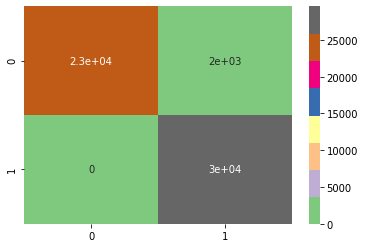

In [226]:
sns.heatmap(confusion_matrix(actual_delivery_risk,predicted_delivery_risk),cmap="Accent",annot=True)

Text(0.5, 1.0, 'Actual Late Deliveries')

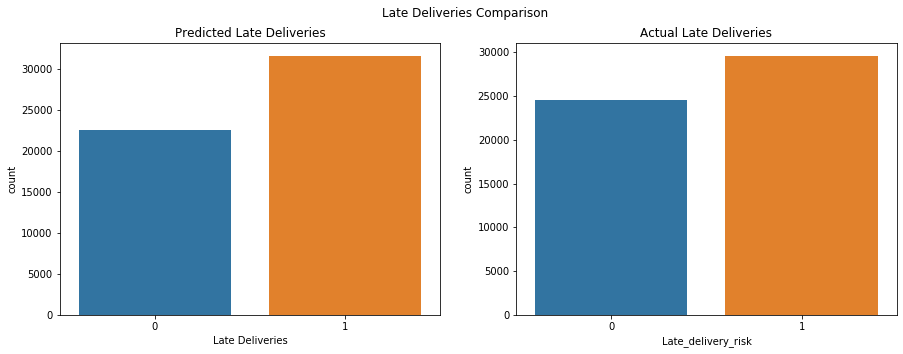

In [241]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Late Deliveries Comparison")
sns.countplot(ax=ax[0],x="Late Deliveries",data=df_shipping)
ax[0].set_title("Predicted Late Deliveries")
sns.countplot(ax=ax[1],x="Late_delivery_risk",data=X_test)
ax[1].set_title("Actual Late Deliveries")

Hence we can say that compared to the actual data late deliveries in predicted model are more than the actual late deliveries